In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

## 原始數據

In [2]:
n = 25
x = [*range(n)]
y = [33, 56 , 87, 104, 160 ,183, 133, 216, 281, 382, 384, 442, 431, 439, 551, 744, 874, 1209, 1199, 1210, 1390, 1626, 2386, 2969, 3766]
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

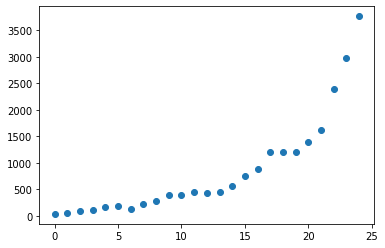

In [3]:
plt.scatter(x, y)

## 使用多項式回歸

### degree = 4

array([[ 4526.70316205],
       [ 5570.07868653],
       [ 6813.81565825],
       [ 8282.65894395],
       [10002.76622143],
       [12001.70797957],
       [14308.46751834],
       [16953.44094875],
       [19968.43719294],
       [23386.67798409],
       [27242.79786645],
       [31572.84419539],
       [36414.27713731],
       [41805.96966972],
       [47788.20758119]])

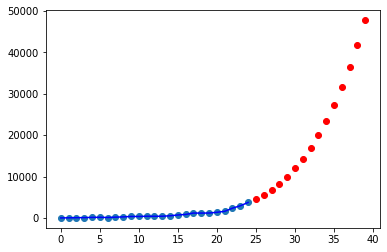

In [4]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)
model2 = LinearRegression()
model2.fit(x_poly, y)

nx = np.array([*range(n, 40)]).reshape(-1, 1)
px = poly.fit_transform(nx)
ny = model2.predict(px)
plt.scatter(x, y)
plt.scatter(nx, ny, color='red')
plt.plot(x, y, color='blue')
display(ny)

## degree = 3

array([[ 4047.33636364],
       [ 4721.96819702],
       [ 5474.04691396],
       [ 6307.83162055],
       [ 7227.58142293],
       [ 8237.55542718],
       [ 9342.01273944],
       [10545.2124658 ],
       [11851.41371238],
       [13264.87558529],
       [14789.85719064],
       [16430.61763454],
       [18191.41602311],
       [20076.51146245],
       [22090.16305868],
       [24236.62991791],
       [26520.17114625],
       [28945.04584981],
       [31515.51313469],
       [34235.83210703]])

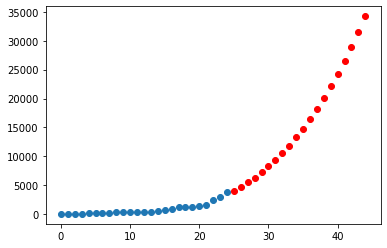

In [5]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
model3 = LinearRegression()
model3.fit(x_poly, y)

nx = np.array([*range(n, n+20)]).reshape(-1, 1)
px = poly.fit_transform(nx)
ny = model3.predict(px)
plt.scatter(x, y)
plt.scatter(nx, ny, color='red')
display(ny)